<a href="https://colab.research.google.com/github/Omprakash977/Restaurant-Clustering-/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Importing libraries and reading the datasets**

In [332]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [333]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
# Importing the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Zomato Restaurant reviews.csv')

# **Inspecting the "Zomato Restaurant names and Metadata" dataset**

In [335]:
# First five rows of the dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [336]:
# Last five rows of the dataset
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [337]:
# Shape of the dataset
df1.shape

(105, 6)

The dataset consists of the data of 105 restaurants, which is represented by 6 columns including the name of the restaurant.

In [338]:
# Data type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Here the cost column needs to be of datatype int or float.

In [339]:
# Changing data type of cost column from object to integer
df1['Cost'] = df1['Cost'].str.replace("," , "").astype('int64')

In [340]:
# finding statistical measures of numerical column
df1.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [341]:
# Checking skewness of cost column
df1.skew()

Cost    1.14345
dtype: float64

Here the distribution of cost column is positively skewed. It can also be visualized using dist plot.

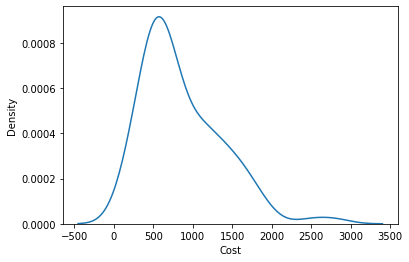

In [342]:
# Creating dist plot of cost column
sns.distplot(df1['Cost'], hist = False)
plt.show()

In [343]:
# Checking null value count of each column
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

There are null values in "Collections" and "Timings" columns. As there columns are of type object we can replace these null values with a string.

In [344]:
# Filling null values with 'Unknown'
df1.fillna('Unknown', inplace = True)

In [345]:
# Checking for any dulicate rows
df1[df1.duplicated()].sum()

Name           0.0
Links          0.0
Cost           0.0
Collections    0.0
Cuisines       0.0
Timings        0.0
dtype: float64

There are no duplicate rows. 

**Now we can proceed towards the exploratory data analysis part where we will find some insights from the dataset.**

## EDA on "Zomato Restaurant names and Metadata" dataset

In [346]:
cuisine_list = df1['Cuisines'].str.split(', ')         # Separating all the cuisines by spliting the column by comma.
restaurants = {}                                       # Creating an empty dictionary which will store the cuisine name as key and count of restaurant as value
for i in cuisine_list:                                 # Iterating through each index
  for j in i:                                          # Iterating inside a particular index
    if (j in restaurants):
      restaurants[j] += 1
    else:
      restaurants[j] = 1

In [347]:
X = pd.DataFrame(restaurants.values(),index = restaurants.keys(), columns = {'Number_of_Restaurants'})  # Converting the above dictionary to dataframe
X.sort_values(by = 'Number_of_Restaurants',ascending = False,inplace = True)                 # Sorting the df by descending order to get most available cusines at top
X = X.head(10)  # fetching the top 10 cuisines

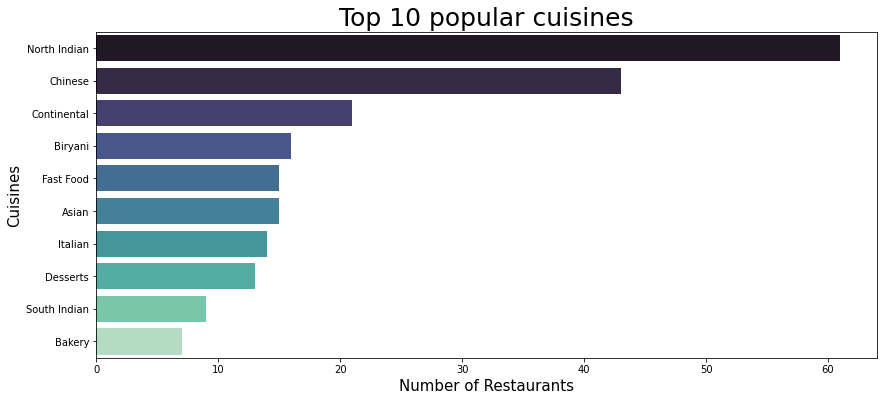

In [348]:
# Plotting the above result
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Number_of_Restaurants', y = X.index,  data = X, palette = "mako")
plt.title("Top 10 popular cuisines", size = 25)
plt.xlabel("Number of Restaurants", size = 15)
plt.ylabel("Cuisines", size = 15)
plt.show()

"North Indian" cuisine is the most popular cuisine which is available in more than 50% of restaurants.

"Chinese" cuisine is the 2nd most available cuisine.

In [349]:
collection_list = df1['Collections'].str.split(', ')  # Separating all the cuisines by spliting the column by comma.
rest = {}                                             # Creating an empty dictionary which will store the collection name as key and count of restaurant as value
for i in collection_list:                             # Iterating through each index
  for j in i:                                         # Iterating inside a particular index
    if (j in rest):
      rest[j] += 1
    else:
      rest[j] = 1

In [350]:
Y = pd.DataFrame(rest.values(),index = rest.keys(), columns = {'Number_of_Restaurants'})  # Converting the above dictionary to dataframe
Y.sort_values(by = 'Number_of_Restaurants',ascending = False,inplace = True)     # Sorting the df by descending order to get most available collection at top
Y = Y[1:11]

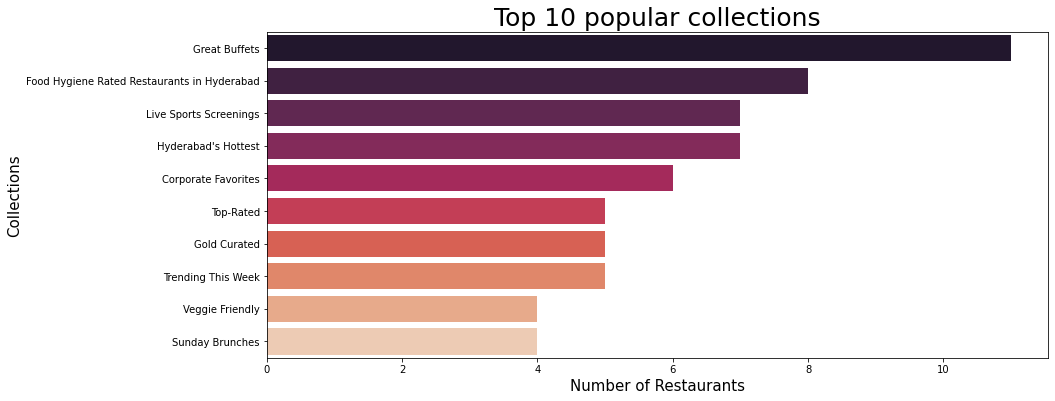

In [351]:
# Plotting the above result
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Number_of_Restaurants', y = Y.index,  data = Y, palette = "rocket")
plt.title("Top 10 popular collections", size = 25)
plt.xlabel("Number of Restaurants", size = 15)
plt.ylabel("Collections", size = 15)
plt.show()

In [352]:
# Creating a new dataframe which is sorted by cost.
rest_cost = df1.sort_values(by = 'Cost',ascending = False)

In [353]:
# Top 10 most expensive restaurants
rest_cost[['Name','Cuisines','Cost']][0:10]

,Name,Cuisines,Cost
92,Collage - Hyatt Hyderabad Gachibowli,"Continental, Italian, North Indian, Chinese, A...",2800
56,Feast - Sheraton Hyderabad Hotel,"Modern Indian, Asian, Continental, Italian",2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,"North Indian, Japanese, Italian, Salad, Sushi",1900
18,10 Downing Street,"North Indian, Chinese, Continental",1900
91,Cascade - Radisson Hyderabad Hitec City,"North Indian, Italian, Continental, Asian",1800
97,Zega - Sheraton Hyderabad Hotel,"Asian, Sushi",1750
104,Republic Of Noodles - Lemon Tree Hotel,"Thai, Asian, Chinese, Malaysian",1700
34,Mazzo - Marriott Executive Apartments,"Italian, North Indian, South Indian, Asian",1700
90,Arena Eleven,Continental,1600
11,Barbeque Nation,"Mediterranean, North Indian, Kebab, BBQ",1600


In [354]:
# Top 10 cheapest restaurants
rest_cost[['Name','Cuisines','Cost']].tail(10).sort_values(by = 'Cost', ascending = True)

,Name,Cuisines,Cost
89,Mohammedia Shawarma,"Street Food, Arabian",150
23,Amul,"Ice Cream, Desserts",150
54,Asian Meal Box,Asian,200
59,KS Bakers,"Bakery, Desserts, Fast Food",200
85,Momos Delight,Momos,200
29,Hunger Maggi Point,Fast Food,200
101,Sweet Basket,"Bakery, Mithai",200
103,Wich Please,Fast Food,250
7,Shah Ghouse Spl Shawarma,Lebanese,300
9,Cream Stone,"Ice Cream, Desserts",350


# **Inspecting the "Zomato Restaurant reviews" dataset**

In [355]:
# First five rows of the dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [356]:
# Last five rows of the dataset
df2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [357]:
# Shape of the dataset
df2.shape

(10000, 7)

There are total 10000 reviews for the 105 restaurants.

In [358]:
# Checking null value count of each column
df2.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

There are few null value in each column. Instead of filling those few null values, it's better to drop those rows.

In [359]:
# Dropping the null values
df2.dropna(inplace = True)

In [360]:
# column information
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


Here we need to change the dtype of rating column from object to int/float. 

In [361]:
# Checking the values of rating column
df2['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

As there is a word 'Like' in the rating column, we can't convert the rating column dtype to integer/float. So to proceed further we have to remove this word from the column.

In [362]:
# Removing 'Like' word from rating column
df2 = df2[df2['Rating'] != 'Like']

In [363]:
# Converting dtype of 'Rating' from object to float64. 
df2['Rating'] = df2['Rating'].astype('float64')

Now from the metadata column, we need to separate the reviews and followers. For this we will make 2 separate column to store those values.

In [364]:
df2['No_of_Reviews'],df2['No_of_Followers']=df2['Metadata'].str.split(',').str        # Splitting by comma.
df2['No_of_Reviews'] = pd.to_numeric(df2['No_of_Reviews'].str.split(' ').str[0])      # Splitting by space and fetching the zeroth index
df2['No_of_Followers'] = pd.to_numeric(df2['No_of_Followers'].str.split(' ').str[1])  # Splitting by space and fetching the first index

# Removing the 'Metadata' column
df2.drop(['Metadata'], axis = 1, inplace=True)

In [365]:
# Checking the final modified dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0


In [366]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9954 non-null   object 
 1   Reviewer         9954 non-null   object 
 2   Review           9954 non-null   object 
 3   Rating           9954 non-null   float64
 4   Time             9954 non-null   object 
 5   Pictures         9954 non-null   int64  
 6   No_of_Reviews    9954 non-null   int64  
 7   No_of_Followers  8380 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 699.9+ KB


**Now we can proceed towards the exploratory data analysis part where we will find some insights from the dataset.**

## EDA on "Zomato Restaurant reviews" dataset

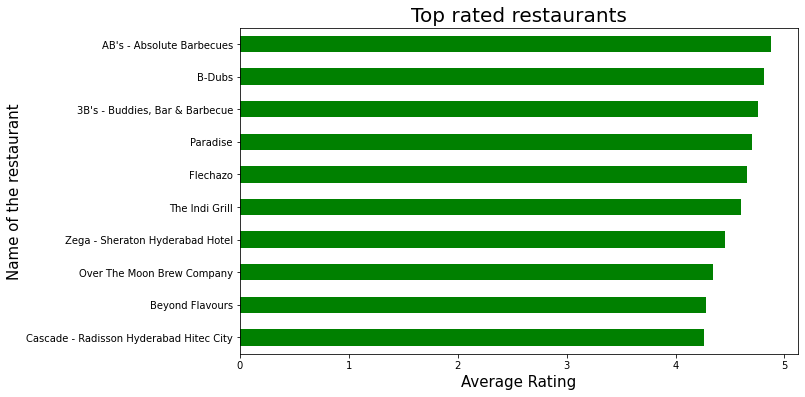

In [367]:
# Top rated restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['Rating'].mean().sort_values(ascending = False).head(10).plot.barh(color = 'g') # Finding the average rating of each restaurant.
plt.title("Top rated restaurants", fontsize=20)
plt.xlabel("Average Rating", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

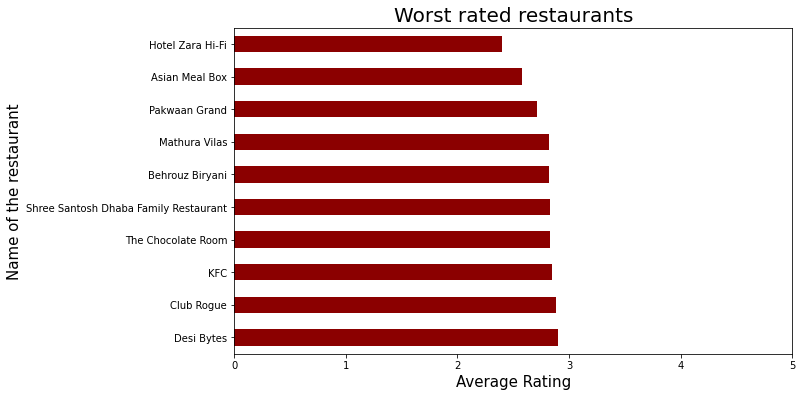

In [368]:
# Worst rated restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['Rating'].mean().sort_values().head(10).plot.barh(color = 'darkred')
plt.title("Worst rated restaurants", fontsize=20)
plt.xlabel("Average Rating", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.xlim([0, 5])
plt.gca().invert_yaxis()
plt.show()

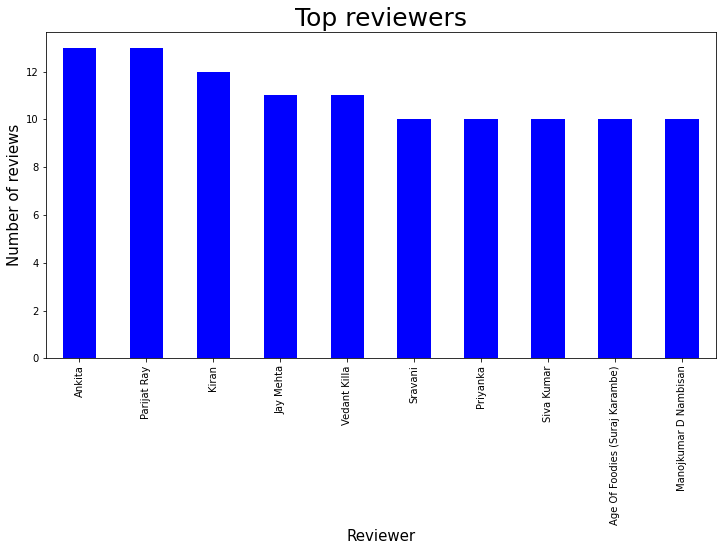

In [369]:
# Top reviewers
plt.figure(figsize=(12,6))
df2['Reviewer'].value_counts().sort_values(ascending = False).head(10).plot.bar(color = 'b')
plt.title("Top reviewers", fontsize=25)
plt.xlabel("Reviewer", fontsize=15)
plt.ylabel("Number of reviews", fontsize=15)
plt.show()

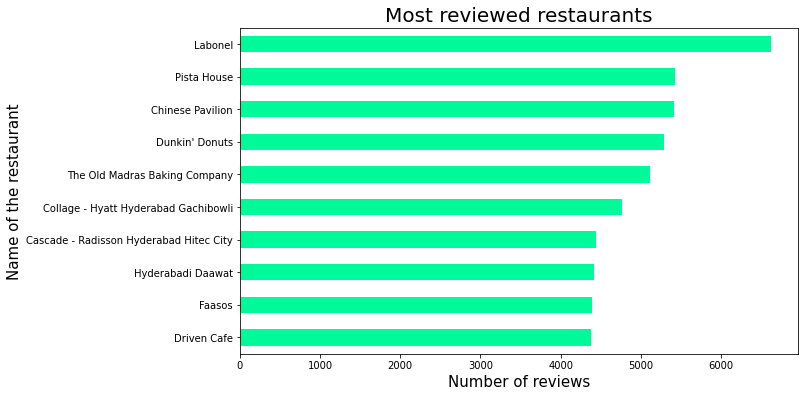

In [370]:
# Most reviewed restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['No_of_Reviews'].sum().sort_values(ascending = False).head(10).plot.barh(color = 'mediumspringgreen')
plt.title("Most reviewed restaurants", fontsize=20)
plt.xlabel("Number of reviews", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

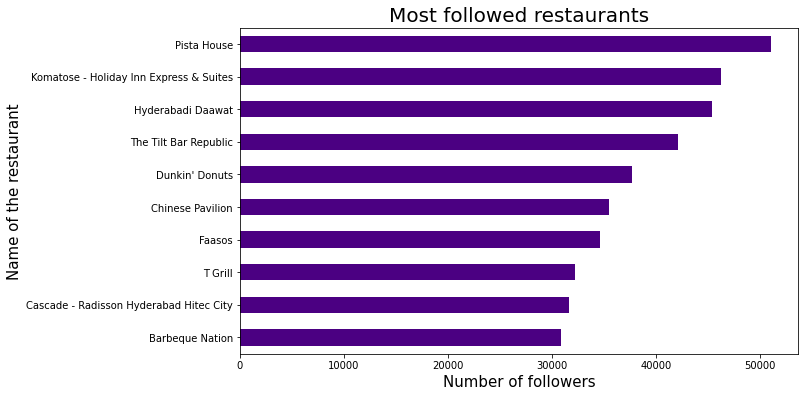

In [371]:
# Most followed restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['No_of_Followers'].sum().sort_values(ascending = False).head(10).plot.barh(color = 'indigo')
plt.title("Most followed restaurants", fontsize=20)
plt.xlabel("Number of followers", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

# **Data preparation for clustering**

In [372]:
# Changing the column name which will help to merge both the datasets.
df2.rename(columns = {'Restaurant':'Name'}, inplace = True)

Now we need to aggregate the 'Rating', 'No_of_Reviews' and 'No_of_Followers' to make it a single value for each restaurant. For this we will take average of each column by grouping them restaurant name wise.

In [373]:
restaurants = list(df2['Name'].unique())
# Initializing three new columns
df2['Mean_Rating'] = 0        
df2['Mean_Reviews'] = 0
df2['Mean_Followers'] = 0

for i in range(len(restaurants)):
    df2['Mean_Rating'][df2['Name'] == restaurants[i]] = df2['Rating'][df2['Name'] == restaurants[i]].mean()
    df2['Mean_Reviews'][df2['Name'] == restaurants[i]] = df2['No_of_Reviews'][df2['Name'] == restaurants[i]].mean()
    df2['Mean_Followers'][df2['Name'] == restaurants[i]] = df2['No_of_Followers'][df2['Name'] == restaurants[i]].mean()

In [374]:
df2.head()

,Name,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Mean_Rating,Mean_Reviews,Mean_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0,4.28,7.52,134.146667
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0,4.28,7.52,134.146667
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0,4.28,7.52,134.146667
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0,4.28,7.52,134.146667
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0,4.28,7.52,134.146667


In [375]:
# Ceaating a new dataframe by taking only the required columns for clustering
df_clust2 = df2[['Name', 'Mean_Rating',	'Mean_Followers']]

As there will be duplicate value in the newly formed dataset, we have to remove them.

In [376]:
df_clust2.drop_duplicates(inplace = True)

In [377]:
# Separating out the required columns from df1 for clustering
df_clust1 = df1[['Name', 'Cost']]

In [378]:
# Merging both the datasets
final_df = pd.merge(df_clust1, df_clust2, on = 'Name')

In [379]:
final_df.head()

,Name,Cost,Mean_Rating,Mean_Followers
0,Beyond Flavours,800,4.28,134.146667
1,Paradise,800,4.70,9.279070
2,Flechazo,1300,4.66,40.411765
3,Shah Ghouse Hotel & Restaurant,800,3.21,155.828947
4,Over The Moon Brew Company,1200,4.34,73.020833


In [380]:
final_df.describe()

,Cost,Mean_Rating,Mean_Followers
count,100.000000,100.000000,100.000000
mean,872.000000,3.601891,189.536758
std,505.940468,0.508100,121.497309
min,150.000000,2.400000,8.264706
25%,500.000000,3.245000,107.947510
50%,700.000000,3.613081,171.492348
75%,1200.000000,3.846250,246.510088
max,2800.000000,4.880000,573.797753


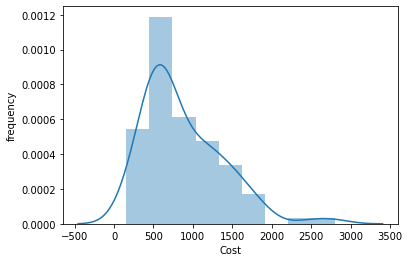

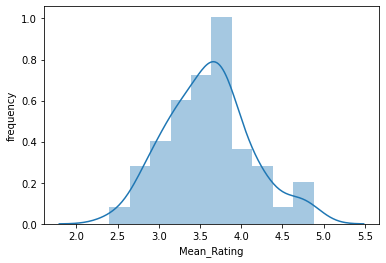

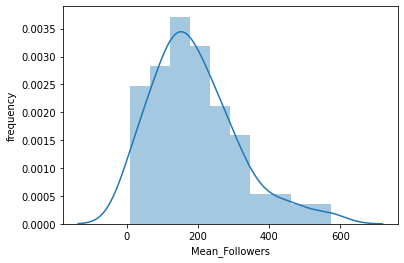

In [381]:
# Checking the distribution of all the columns
for var in final_df.describe().columns:
  sns.distplot(final_df[var].dropna())
  plt.ylabel('frequency')
  plt.xlabel(var)
  plt.show()

As the distribution of 'Cost' and 'Mean_Followers' are slightly right skewed, we will apply square root transformation on these columns to make it normally distributed.

In [382]:
# Applying square root transformation on 'Cost' and 'Mean_Followers' column
final_df['Cost'] = final_df['Cost']**0.5
final_df['Mean_Followers'] = final_df['Mean_Followers']**0.5

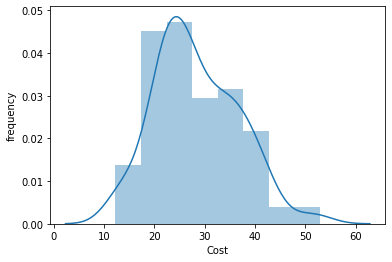

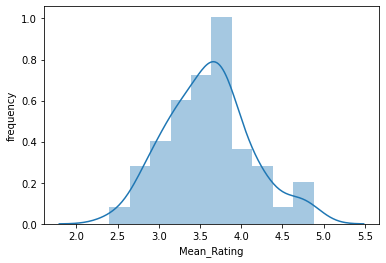

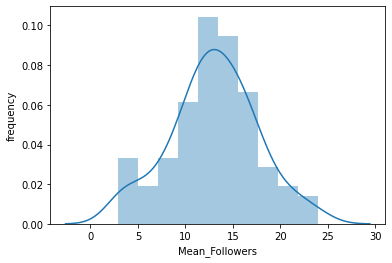

In [383]:
# Checking the distribution of all the columns
for var in final_df.describe().columns:
  sns.distplot(final_df[var].dropna())
  plt.ylabel('frequency')
  plt.xlabel(var)
  plt.show()

Now as all the features are nearly normally distributed we can proceed futher to cluster them together.